In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('.')
from omegaconf import DictConfig, OmegaConf
import hydra
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"  #import it before torch!  https://discuss.pytorch.org/t/cuda-visible-device-is-of-no-use/10018/11


import numpy as np
import torch
import wandb
import pickle
from collections import defaultdict

import random


In [2]:
file_name = 'chi_square_original_dict.pickle'
file_path = os.path.join('../../chi_square_original_dict.pickle')
print(file_path)
with open(file_path, 'rb') as file:
    chi_square_original = pickle.load(file)
print(chi_square_original['flow_0'].keys())

model_name = 'MLP_plus'
file_path = os.path.join('../../chi_square_residual_dict_'+ model_name +'.pickle')
print(file_path)
with open(file_path, 'rb') as file:
    chi_square_residual = pickle.load(file)

print(chi_square_residual['flow_0'].keys())


../../chi_square_original_dict.pickle
dict_keys(['dep_train', 'dep_test', 'dep_intersect', 'train_windows', 'test_windows'])
../../chi_square_residual_dict_MLP_plus.pickle
dict_keys(['train_windows', 'dep_train', 'test_windows', 'dep_test', 'dep_intersect'])


In [3]:
with open('../../selected_result_dict.pickle', 'rb') as file1:
    selected_res = pickle.load(file1)

In [4]:
print(selected_res['flow_0'].keys())

dict_keys(['flowise_normalized_test', 'flowise_normalized_train', 'dep_train', 'dep_test', 'dep_intersect'])


In [5]:
print(selected_res.keys())
selected_keys = list(selected_res.keys())
print("------------------------------------------------------------------------------------------------------------")
print(selected_keys)
print(len(selected_keys))

dict_keys(['flow_0', 'flow_2', 'flow_3', 'flow_12', 'flow_17', 'flow_19', 'flow_20', 'flow_22', 'flow_28', 'flow_33', 'flow_37', 'flow_43', 'flow_48', 'flow_51', 'flow_54', 'flow_55', 'flow_62', 'flow_66', 'flow_67', 'flow_92', 'flow_100', 'flow_101', 'flow_103', 'flow_118', 'flow_122', 'flow_123', 'flow_124', 'flow_143', 'flow_158', 'flow_164', 'flow_167', 'flow_177', 'flow_178', 'flow_187', 'flow_196', 'flow_197', 'flow_198', 'flow_209', 'flow_216', 'flow_220', 'flow_221', 'flow_223', 'flow_224', 'flow_232', 'flow_237', 'flow_240', 'flow_243', 'flow_249', 'flow_255', 'flow_259', 'flow_263', 'flow_275', 'flow_280', 'flow_285', 'flow_295', 'flow_296', 'flow_299', 'flow_302', 'flow_318', 'flow_321', 'flow_325', 'flow_327', 'flow_332', 'flow_336', 'flow_338', 'flow_343', 'flow_346', 'flow_350', 'flow_353', 'flow_359', 'flow_363', 'flow_367', 'flow_371', 'flow_380', 'flow_381', 'flow_390', 'flow_391', 'flow_406', 'flow_411', 'flow_412', 'flow_413', 'flow_417', 'flow_419', 'flow_420', 'flo

In [6]:
# Define a dictionary to store all dictionaries

#NST_dictionary_res = defaultdict(list)

In [7]:
directory_NST = os.path.join( os.path.dirname(os.path.dirname(os.getcwd())),  'downloaded_dict' ,'NST')
directory_MLP = os.path.join( os.path.dirname(os.path.dirname(os.getcwd())),  'downloaded_dict' ,'MLP_PLUS')
directory_VAT = os.path.join( os.path.dirname(os.path.dirname(os.getcwd())),  'downloaded_dict' ,'VANILLA')

 #'/path/to/your/pickle/files'


In [8]:
#VANILLA TRANSFORMER
# Iterate through the directory and its subdirectories
VAT_dictionary_res = defaultdict(list)
for root, _, files in os.walk(directory_VAT):
    for filename in files:
        if filename.endswith('.pickle'):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                for key, value in data.items():
                    #MLP_dictionary_res[key].append(value)
                    VAT_dictionary_res[key].append(value)

missing_keys = set(selected_keys) - set(VAT_dictionary_res.keys())
print(missing_keys)

'''solve the missing keys later'''
print(len(missing_keys))

set()
0


In [9]:
# Iterate through the directory and its subdirectories
NST_dictionary_res = defaultdict(list)
for root, _, files in os.walk(directory_NST):
    for filename in files:
        if filename.endswith('.pickle'):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                for key, value in data.items():
                    #MLP_dictionary_res[key].append(value)
                    NST_dictionary_res[key].append(value)

missing_keys = set(selected_keys) - set(NST_dictionary_res.keys())
print(missing_keys)

'''solve the missing keys later'''
print(len(missing_keys))

set()
0


In [10]:
len(NST_dictionary_res.keys())

240

In [11]:

#MLP
MLP_dictionary_res = defaultdict(list)
for root, _, files in os.walk(directory_MLP):
    for filename in files:
        if filename.endswith('.pickle'):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                for key, value in data.items():
                    #MLP_dictionary_res[key].append(value)
                    MLP_dictionary_res[key].append(value)

missing_keys = set(selected_keys) - set(MLP_dictionary_res.keys())
print(missing_keys)

'''solve the missing keys later'''
print(len(missing_keys))

set()
0


In [12]:
# print(len(MLP_dictionary_res['flow_0']))
print(MLP_dictionary_res['flow_0'][0])
#NST_dictionary_res
print(NST_dictionary_res['flow_0'][0].keys())
print(VAT_dictionary_res['flow_0'][0].keys())


{'flowise_normalized_test': 0.8104730507864751, 'flowise_normalized_train': 0.6465701610691942, 'dep_train': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'dep_test': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'dep_intersect': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}
dict_keys(['flowise_normalized_test', 'flowise_normalized_train', 'dep_train', 'dep_test', 'dep_intersect'])
dict_keys(['flowise_normalized_test', 'flowise_normalized_train', 'dep_train', 'dep_test', 'dep_intersect'])


In [13]:
def find_min_and_index(lst):
    if not lst:
        return None, None  # Return None for both value and index if the list is empty

    min_value = lst[0]
    min_index = 0

    for index, value in enumerate(lst):
        if value < min_value:
            min_value = value
            min_index = index

    return min_value, min_index

# Example usage:
my_list = [5, 2, 9, 1, 5]
min_value, min_index = find_min_and_index(my_list)
print(f"The minimum value is {min_value} at index {min_index}")

The minimum value is 1 at index 3


In [14]:
min_err_NST={}
min_indices_NST = {}


for i,(key,inner_dict) in enumerate(NST_dictionary_res.items()):
    l1= len(NST_dictionary_res[key])
    test_err = []
    train_err= []
    min_err_NST[key] ={}
    min_err_NST[key]['dep_train'] = len(selected_res[key]['dep_train'])
    min_err_NST[key]['dep_test'] = len(selected_res[key]['dep_test'])
    min_err_NST[key]['dep_intersect'] = len(selected_res[key]['dep_intersect'])

    if(l1>1):

        print("for ",key," we have ",l1,"resuts..")
        for j in range(l1):
            test_err.append(NST_dictionary_res[key][j]['flowise_normalized_test'])
            #train_err.append(NST_dictionary_res[key][j]['flowise_normalized_train'])
        print(test_err)
        min_err_NST[key]['test_err'] , min_indices_NST[key] = find_min_and_index(test_err)
        min_err_NST[key]['train_err'] = NST_dictionary_res[key][min_indices_NST[key]]['flowise_normalized_train']
    elif(l1==1):
        min_err_NST[key]['test_err'] = NST_dictionary_res[key][0]['flowise_normalized_test']
        min_err_NST[key]['train_err'] =  NST_dictionary_res[key][0]['flowise_normalized_train']
            # print(key,"--->dep-test:",len(selected_res[key]['dep_test']) , '   dep-interect:',len(selected_res[key]['dep_intersect']) ,'  dep-train:', len(selected_res[key]['dep_train']))

    else:
        raise ValueError('key:',key,"doesnt Exist...")

print("********************************************")
print(min_err_NST)

for  flow_0  we have  3 resuts..
[0.8011403227658458, 0.8044993160362791, 0.8150837687446749]
for  flow_48  we have  2 resuts..
[0.6983000805425955, 0.636876261540815]
********************************************
{'flow_255': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.3060118000477529, 'train_err': 0.2906587748170574}, 'flow_693': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.4568215938114607, 'train_err': 0.48701922514545193}, 'flow_553': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.23110585812139328, 'train_err': 0.2140660806680919}, 'flow_196': {'dep_train': 49, 'dep_test': 46, 'dep_intersect': 46, 'test_err': 0.7915718144931639, 'train_err': 0.77026045273781}, 'flow_1110': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.8235184107221255, 'train_err': 0.7852882463755624}, 'flow_503': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7682834758666705, 'train_err': 0.793160

In [15]:
min_err_VAT={}
min_indices_VAT = {}

for i,(key,inner_dict) in enumerate(VAT_dictionary_res.items()):
    l1= len(VAT_dictionary_res[key])
    test_err = []
    train_err= []
    min_err_VAT[key] ={}
    min_err_VAT[key]['dep_train'] = len(selected_res[key]['dep_train'])
    min_err_VAT[key]['dep_test'] = len(selected_res[key]['dep_test'])
    min_err_VAT[key]['dep_intersect'] = len(selected_res[key]['dep_intersect'])

    if(l1>1):

        print("for ",key," we have ",l1,"resuts..")
        for j in range(l1):
            test_err.append(VAT_dictionary_res[key][j]['flowise_normalized_test'])
            #train_err.append(NST_dictionary_res[key][j]['flowise_normalized_train'])
        print(test_err)
        min_err_VAT[key]['test_err'] , min_indices_VAT[key] = find_min_and_index(test_err)
        min_err_VAT[key]['train_err'] = VAT_dictionary_res[key][min_indices_VAT[key]]['flowise_normalized_train']
    elif(l1==1):
        min_err_VAT[key]['test_err'] = VAT_dictionary_res[key][0]['flowise_normalized_test']
        min_err_VAT[key]['train_err'] =  VAT_dictionary_res[key][0]['flowise_normalized_train']
            # print(key,"--->dep-test:",len(selected_res[key]['dep_test']) , '   dep-interect:',len(selected_res[key]['dep_intersect']) ,'  dep-train:', len(selected_res[key]['dep_train']))

    else:
        raise ValueError('key:',key,"doesnt Exist...")

print("********************************************")
print(min_err_VAT)

********************************************
{'flow_443': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.4113136537804472, 'train_err': 0.36688256998912094}, 'flow_872': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.620535796768424, 'train_err': 0.6676135827485028}, 'flow_413': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.5947149194402555, 'train_err': 0.4917573004816378}, 'flow_773': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.3748469739857186, 'train_err': 0.36009043986873557}, 'flow_1053': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.9261653822838063, 'train_err': 0.9961972178295406}, 'flow_1101': {'dep_train': 14, 'dep_test': 49, 'dep_intersect': 14, 'test_err': 0.6949159045140577, 'train_err': 0.7001728468741908}, 'flow_783': {'dep_train': 14, 'dep_test': 49, 'dep_intersect': 14, 'test_err': 0.9930180176515842, 'train_err': 0.9820270147019348}, 'flow_302': {'dep_tr

In [16]:
min_err_MLP={}
min_indices_MLP = {}

for i,(key,inner_dict) in enumerate(MLP_dictionary_res.items()):
    l1= len(MLP_dictionary_res[key])
    test_err = []
    train_err= []
    min_err_MLP[key] ={}
    min_err_MLP[key]['dep_train'] = len(selected_res[key]['dep_train'])
    min_err_MLP[key]['dep_test'] = len(selected_res[key]['dep_test'])
    min_err_MLP[key]['dep_intersect'] = len(selected_res[key]['dep_intersect'])

    if(l1>1):

        print("for ",key," we have ",l1,"resuts..")
        for j in range(l1):
            test_err.append(MLP_dictionary_res[key][j]['flowise_normalized_test'])
            #train_err.append(NST_dictionary_res[key][j]['flowise_normalized_train'])
        print(test_err)
        min_err_MLP[key]['test_err'] , min_indices_MLP[key] = find_min_and_index(test_err)
        min_err_MLP[key]['train_err'] = MLP_dictionary_res[key][min_indices_MLP[key]]['flowise_normalized_train']
    elif(l1==1):
        min_err_MLP[key]['test_err'] = MLP_dictionary_res[key][0]['flowise_normalized_test']
        min_err_MLP[key]['train_err'] =  MLP_dictionary_res[key][0]['flowise_normalized_train']
            # print(key,"--->dep-test:",len(selected_res[key]['dep_test']) , '   dep-interect:',len(selected_res[key]['dep_intersect']) ,'  dep-train:', len(selected_res[key]['dep_train']))

    else:
        raise ValueError('key:',key,"doesnt Exist...")

print("********************************************")
print(min_err_MLP)

********************************************
{'flow_811': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.6298532448794936, 'train_err': 0.5890009112686597}, 'flow_1009': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.9748181466479227, 'train_err': 0.8809899562901163}, 'flow_381': {'dep_train': 1, 'dep_test': 9, 'dep_intersect': 1, 'test_err': 1.1089474608297194, 'train_err': 1.0135128776854145}, 'flow_122': {'dep_train': 39, 'dep_test': 49, 'dep_intersect': 39, 'test_err': 0.8418406426477855, 'train_err': 0.8259845836015276}, 'flow_443': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.4149545092682737, 'train_err': 0.33472148031458004}, 'flow_495': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.4169983823988955, 'train_err': 0.3651049510191705}, 'flow_982': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.9217198444163547, 'train_err': 0.8857944009740315}, 'flow_946': {'dep_train'

In [17]:
# Define a custom sorting key function
def custom_sort_key(key):
    # Split the key into two parts: the prefix ('flow_') and the numeric part
    prefix, numeric_part = key.split('_')
    # Convert the numeric part to an integer for sorting
    return int(numeric_part)

MLP_final_result_dict = dict(sorted(min_err_MLP.items(), key=lambda item: custom_sort_key(item[0])))
NST_final_result_dict = dict(sorted(min_err_NST.items(), key=lambda item: custom_sort_key(item[0])))
VAT_final_result_dict = dict(sorted(min_err_VAT.items(), key=lambda item: custom_sort_key(item[0])))

print(MLP_final_result_dict)

{'flow_0': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.8104730507864751, 'train_err': 0.6465701610691942}, 'flow_2': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 1.0250368098989067, 'train_err': 0.7979931776710749}, 'flow_3': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7502501950107286, 'train_err': 0.66763886661782}, 'flow_12': {'dep_train': 6, 'dep_test': 7, 'dep_intersect': 6, 'test_err': 0.8465678430735107, 'train_err': 0.8273436173814346}, 'flow_17': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.48635842993841394, 'train_err': 0.4353601482942842}, 'flow_19': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.39558821345381306, 'train_err': 0.4723739591458843}, 'flow_20': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.11152242066384872, 'train_err': 0.12666148879242498}, 'flow_22': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0

In [18]:
print(NST_final_result_dict)

{'flow_0': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.8011403227658458, 'train_err': 0.7405967208386046}, 'flow_2': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7618808029833443, 'train_err': 0.7856531327976916}, 'flow_3': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7472356727085383, 'train_err': 0.6937048387414523}, 'flow_12': {'dep_train': 6, 'dep_test': 7, 'dep_intersect': 6, 'test_err': 0.8304098518304353, 'train_err': 0.871748752503862}, 'flow_17': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.48794810225797486, 'train_err': 0.4612496639661941}, 'flow_19': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.3774708195844867, 'train_err': 0.4697425694864642}, 'flow_20': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.11730028308585021, 'train_err': 0.1299679723481849}, 'flow_22': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.

In [19]:
print(VAT_final_result_dict)


{'flow_0': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7803717506721775, 'train_err': 0.7359282841103614}, 'flow_2': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 1.5558133058351302, 'train_err': 0.8722767087192569}, 'flow_3': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 1.0436512439671075, 'train_err': 0.790748413763014}, 'flow_12': {'dep_train': 6, 'dep_test': 7, 'dep_intersect': 6, 'test_err': 0.8661312414494542, 'train_err': 0.8780894307069367}, 'flow_17': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7453113088421967, 'train_err': 0.4866528067266076}, 'flow_19': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.7948040715005577, 'train_err': 0.6577407342208788}, 'flow_20': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.3078172227948718, 'train_err': 0.41337177787610335}, 'flow_22': {'dep_train': 49, 'dep_test': 49, 'dep_intersect': 49, 'test_err': 0.5

In [20]:
# ruye intersect:
#
# for bezar az x = 0to49 unaee ke x=i y ra begir
from scipy.stats import linregress


## MLP results:

slope_mlp: -0.00780166136085524
intecept_mlp: 1.040480572990654


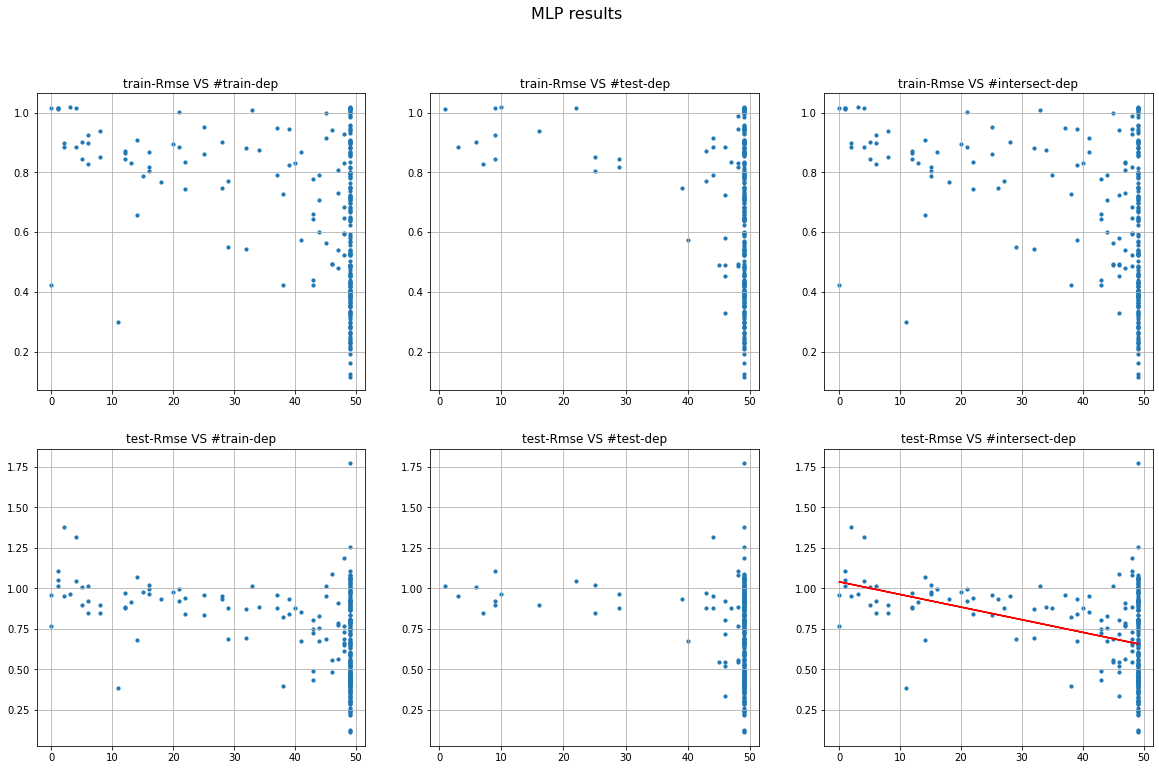

In [21]:
#MLP:
# Initialize empty lists to store the 'x' and 'y' values

x_train = []
x_test = []
x_intersect= []

x_train_residual = []
x_test_residual = []
x_intersect_in_residual = []

y_train = []
y_test = []


# Iterate through your final_result_dict
for flow_key, data in MLP_final_result_dict.items():
    x1 = data['dep_train']
    x2 = data['dep_test']
    x3 = data['dep_intersect']
    #print(x3)
    x_train_res = len(chi_square_residual[flow_key]['dep_train'])
    x_test_res  = len(chi_square_residual[flow_key]['dep_test'])
    x_intersect_res = len(chi_square_residual[flow_key]['dep_intersect'])



    y1 = data['train_err']
    y2 = data['test_err']

    x_train.append(x1)
    x_test.append(x2)
    x_intersect.append(x3)

    x_train_residual.append(x_train_res)
    x_test_residual.append(x_test_res)
    x_intersect_in_residual.append(x_intersect_res)


    y_train.append(y1)
    y_test.append(y2)

# Perform linear regression
slope_MLP, intercept_MLP, r_value_MLP, p_value_MLP, std_err_MLP = linregress(x_intersect, y_test)

# Create a line of best fit
x_fit_MLP = np.array(x_intersect)
y_fit_MLP = intercept_MLP + slope_MLP * x_fit_MLP

# Create the 2D plot using Matplotlib
fig1 , axs = plt.subplots(2, 3, figsize=(20,12))

axs[0][0].scatter(x_train, y_train, marker='o', s=10)  # s specifies the marker size
axs[0][0].set_title('train-Rmse VS #train-dep')

axs[0][1].scatter(x_test, y_train, marker='o', s=10)  # s specifies the marker size
axs[0][1].set_title('train-Rmse VS #test-dep')

axs[0][2].scatter(x_intersect, y_train, marker='o', s=10)  # s specifies the marker size
axs[0][2].set_title('train-Rmse VS #intersect-dep')




axs[1][0].scatter(x_train, y_test, marker='o', s=10)  # s specifies the marker size
axs[1][0].set_title('test-Rmse VS #train-dep')

axs[1][1].scatter(x_test, y_test, marker='o', s=10)  # s specifies the marker size
axs[1][1].set_title('test-Rmse VS #test-dep')

axs[1][2].scatter(x_intersect, y_test, marker='o', s=10)  # s specifies the marker size
axs[1][2].set_title('test-Rmse VS #intersect-dep')

axs[1][2].plot(x_fit_MLP, y_fit_MLP, label='Line of Best Fit', color='red')

# print(len(x_intersect))
# print(len(x_intersect_in_residual))
# axs[1][3].scatter(x_intersect, x_intersect_in_residual, marker='o', s=10)  # s specifies the marker size
# axs[1][3].set_title('x:old_dep-intersect VS y:new_dep-intersect')
# axs[1][3].set_xlabel('#dep-intersection')
# axs[1][3].set_ylabel('#dep-intersection-in-residual')




# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('2D Plot of x and y')
axs[0][0].grid(True)
axs[0][1].grid(True)
axs[0][2].grid(True)
axs[1][0].grid(True)
axs[1][1].grid(True)
axs[1][2].grid(True)

fig1.suptitle('MLP results', fontsize=16)

print('slope_mlp:',slope_MLP)
print('intecept_mlp:',intercept_MLP)

plt.show()







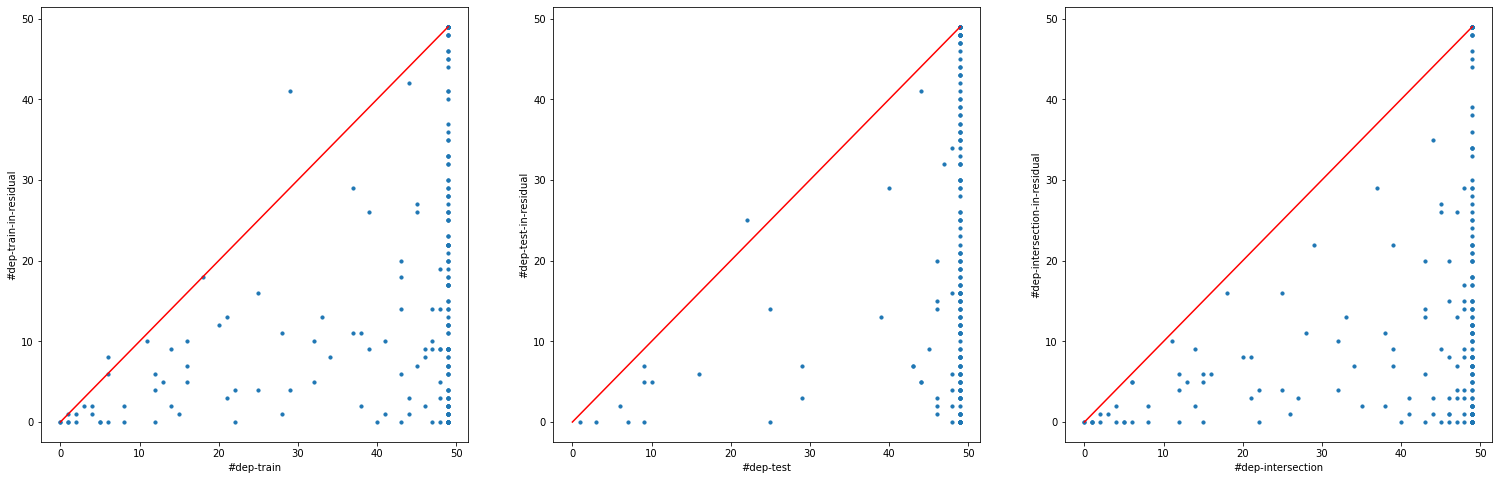

In [22]:
fig3 , axs = plt.subplots( 1,3, figsize=(26,8))

axs[0].scatter(x_train, x_train_residual, marker='o', s=10)  # s specifies the marker size
#axs[0].set_title('x:old_dep-intersect VS y:new_dep-intersect')
axs[0].set_xlabel('#dep-train')
axs[0].set_ylabel('#dep-train-in-residual')
axs[0].plot(np.arange(50), np.arange(50) , color='red')  # s specifies the marker size


axs[1].scatter(x_test, x_test_residual, marker='o', s=10)  # s specifies the marker size
#axs[0].set_title('x:old_dep-intersect VS y:new_dep-intersect')
axs[1].set_xlabel('#dep-test')
axs[1].set_ylabel('#dep-test-in-residual')
axs[1].plot(np.arange(50), np.arange(50) , color='red')  # s specifies the marker size



axs[2].scatter(x_intersect, x_intersect_in_residual, marker='o', s=10)  # s specifies the marker size
#axs[2].set_title('x:old_dep-intersect VS y:new_dep-intersect')
axs[2].set_xlabel('#dep-intersection')
axs[2].set_ylabel('#dep-intersection-in-residual')
axs[2].plot(np.arange(50), np.arange(50) , color='red')  # s specifies the marker size


In [33]:
#average MLP:

x_test_MLP = []
x_train_MLP = []
x_intersect_MLP  = []

averaged_y_test_MLP  = []
averaged_y_train_MLP  = []
averaged_y_intersect_MLP  = []



for x in range(50):  # Iterate over possible 'x' values from 0 to 49
    y_test_values_MLP  = []  # Store 'y' values for a particular 'x'
    y_train_values_MLP  = []
    y_intersect_values_MLP  = []
    print("x:",x)

    for flow_key, data_MLP  in MLP_final_result_dict.items():
        if data_MLP['dep_test'] == x:
            y_test_values_MLP.append(data_MLP['test_err'])

        if data_MLP['dep_train'] == x:
            y_train_values_MLP.append(data_MLP['train_err'])

        if data_MLP['dep_intersect'] == x:
            y_intersect_values_MLP.append(data_MLP['test_err'])

    if y_test_values_MLP:  # Check if there are 'y' values for this 'x'
        print('test')
        x_test_MLP.append(x)
        averaged_y_test_MLP.append(np.mean(y_test_values_MLP))

    if y_train_values_MLP:  # Check if there are 'y' values for this 'x'
        print('train')
        x_train_MLP.append(x)
        averaged_y_train_MLP.append(np.mean(y_train_values_MLP))

    if y_intersect_values_MLP:  # Check if there are 'y' values for this 'x'
        print('intersect')
        x_intersect_MLP.append(x)
        averaged_y_intersect_MLP.append(np.mean(y_intersect_values_MLP))
    print("**********************************************************************")




x: 0
train
intersect
**********************************************************************
x: 1
test
train
intersect
**********************************************************************
x: 2
train
intersect
**********************************************************************
x: 3
test
train
intersect
**********************************************************************
x: 4
train
intersect
**********************************************************************
x: 5
train
intersect
**********************************************************************
x: 6
test
train
intersect
**********************************************************************
x: 7
test
**********************************************************************
x: 8
train
intersect
**********************************************************************
x: 9
test
**********************************************************************
x: 10
test
**********************************************************************
x: 11

slope_avgmlp: -0.0050650415205797964
intercept_avgmlp_avgmlp: 0.9957962245480677


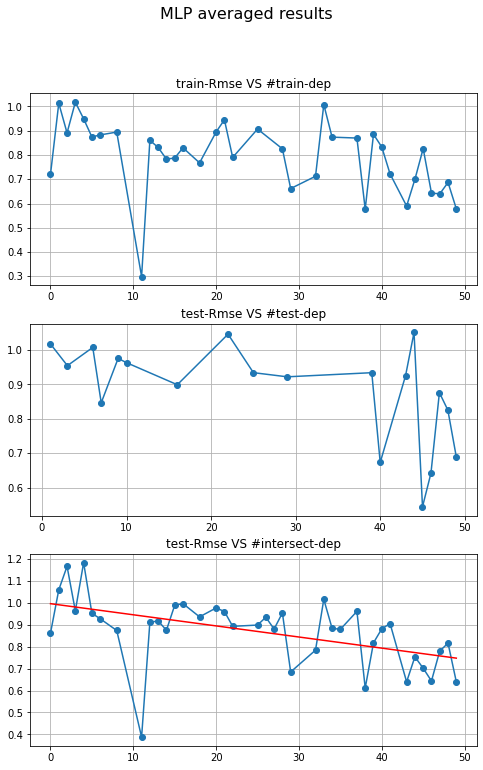

In [34]:

fig2 , axs = plt.subplots(3, 1, figsize=(8,12))
axs[0].plot(x_train_MLP, averaged_y_train_MLP, marker='o', linestyle='-')
axs[0].set_title('train-Rmse VS #train-dep')

#axs[0].xlabel('x')
#axs[0].ylabel('Average y')
#axs[0].title('Averaged 2D Plot')


axs[1].plot(x_test_MLP, averaged_y_test_MLP, marker='o', linestyle='-')
axs[1].set_title('test-Rmse VS #test-dep')

axs[2].plot(x_intersect_MLP, averaged_y_intersect_MLP, marker='o', linestyle='-')
axs[2].set_title('test-Rmse VS #intersect-dep')


# Perform linear regression
slope_avgmlp, intercept_avgmlp, r_value_avgmlp, p_value_avgmlp, std_err_avgmlp = linregress(x_intersect_MLP, averaged_y_intersect_MLP)
# Create a line of best fit
x_fit_avgmlp = np.array(x_intersect_MLP)
y_fit_avgmlp = intercept_avgmlp + slope_avgmlp * x_fit_avgmlp
axs[2].plot(x_fit_avgmlp, y_fit_avgmlp, color='red')


axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
fig2.suptitle('MLP averaged results', fontsize=16)


print("slope_avgmlp:",slope_avgmlp)
print("intercept_avgmlp_avgmlp:",intercept_avgmlp)

plt.show()

## VAT model

slope_VAT: -0.008550192250521468
intercept_VAT: 1.1328140221614365


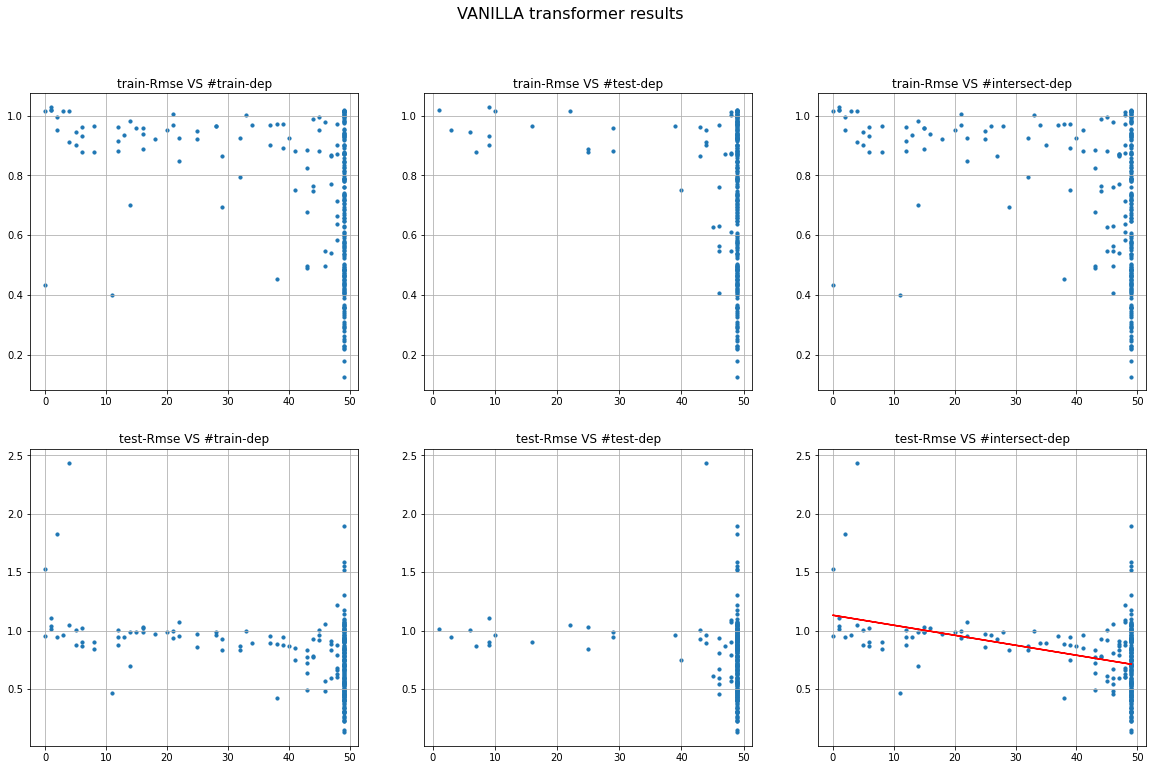

In [35]:
#Initialize empty lists to store the 'x' and 'y' values
#NST
x_train_VAT = []
x_test_VAT = []
x_intersect_VAT= []

y_train_VAT = []
y_test_VAT = []


# Iterate through your final_result_dict
for flow_key, data_VAT in VAT_final_result_dict.items():
    x1 = data_VAT['dep_train']
    x2 = data_VAT['dep_test']
    x3 = data_VAT['dep_intersect']

    y1 = data_VAT['train_err']
    y2 = data_VAT['test_err']

    x_train_VAT.append(x1)
    x_test_VAT.append(x2)
    x_intersect_VAT.append(x3)

    y_train_VAT.append(y1)
    y_test_VAT.append(y2)



# Perform linear regression
slope_VAT, intercept_VAT, r_value_VAT, p_value_VAT, std_err_VAT = linregress(x_intersect_VAT, y_test_VAT)

# Create a line of best fit
x_fit_VAT = np.array(x_intersect_VAT)
y_fit_VAT = intercept_VAT + slope_VAT * x_fit_VAT

# Create the 2D plot using Matplotlib
fig2 , axs = plt.subplots(2, 3, figsize=(20,12))

axs[0][0].scatter(x_train_VAT, y_train_VAT, marker='o', s=10)  # s specifies the marker size
axs[0][0].set_title('train-Rmse VS #train-dep')

axs[0][1].scatter(x_test_VAT, y_train_VAT, marker='o', s=10)  # s specifies the marker size
axs[0][1].set_title('train-Rmse VS #test-dep')

axs[0][2].scatter(x_intersect_VAT, y_train_VAT, marker='o', s=10)  # s specifies the marker size
axs[0][2].set_title('train-Rmse VS #intersect-dep')




axs[1][0].scatter(x_train_VAT, y_test_VAT, marker='o', s=10)  # s specifies the marker size
axs[1][0].set_title('test-Rmse VS #train-dep')

axs[1][1].scatter(x_test_VAT, y_test_VAT, marker='o', s=10)  # s specifies the marker size
axs[1][1].set_title('test-Rmse VS #test-dep')

axs[1][2].scatter(x_intersect_VAT, y_test_VAT, marker='o', s=10)  # s specifies the marker size
axs[1][2].set_title('test-Rmse VS #intersect-dep')
axs[1][2].plot(x_fit_VAT, y_fit_VAT, label='Line of Best Fit', color='red')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('2D Plot of x and y')
axs[0][0].grid(True)
axs[0][1].grid(True)
axs[0][2].grid(True)
axs[1][0].grid(True)
axs[1][1].grid(True)
axs[1][2].grid(True)
fig2.suptitle('VANILLA transformer results', fontsize=16)

print("slope_VAT:",slope_VAT)
print("intercept_VAT:",intercept_VAT)


plt.show()



In [36]:
x_test_VAT = []
x_train_VAT = []
x_intersect_VAT = []

averaged_y_test_VAT = []
averaged_y_train_VAT = []
averaged_y_intersect_VAT = []

for x in range(50):  # Iterate over possible 'x' values from 0 to 49
    y_test_values_VAT = []  # Store 'y' values for a particular 'x'
    y_train_values_VAT = []
    y_intersect_values_VAT = []
    print("x:", x)

    for flow_key, data_VAT in VAT_final_result_dict.items():
        if data_VAT['dep_test'] == x:
            y_test_values_VAT.append(data_VAT['test_err'])

        if data_VAT['dep_train'] == x:
            y_train_values_VAT.append(data_VAT['train_err'])

        if data_VAT['dep_intersect'] == x:
            y_intersect_values_VAT.append(data_VAT['test_err'])

    if y_test_values_VAT:  # Check if there are 'y' values for this 'x'
        print('test')
        x_test_VAT.append(x)
        averaged_y_test_VAT.append(np.mean(y_test_values_VAT))

    if y_train_values_VAT:  # Check if there are 'y' values for this 'x'
        print('train')
        x_train_VAT.append(x)
        averaged_y_train_VAT.append(np.mean(y_train_values_VAT))

    if y_intersect_values_VAT:  # Check if there are 'y' values for this 'x'
        print('intersect')
        x_intersect_VAT.append(x)
        averaged_y_intersect_VAT.append(np.mean(y_intersect_values_VAT))
    print("**********************************************************************")

print(len(x_train_VAT))
print(len(averaged_y_train_VAT))

x: 0
train
intersect
**********************************************************************
x: 1
test
train
intersect
**********************************************************************
x: 2
train
intersect
**********************************************************************
x: 3
test
train
intersect
**********************************************************************
x: 4
train
intersect
**********************************************************************
x: 5
train
intersect
**********************************************************************
x: 6
test
train
intersect
**********************************************************************
x: 7
test
**********************************************************************
x: 8
train
intersect
**********************************************************************
x: 9
test
**********************************************************************
x: 10
test
**********************************************************************
x: 11

slope_avgVAT: -0.007231012168747508
intercept_avgVAT: 1.1086342838270677


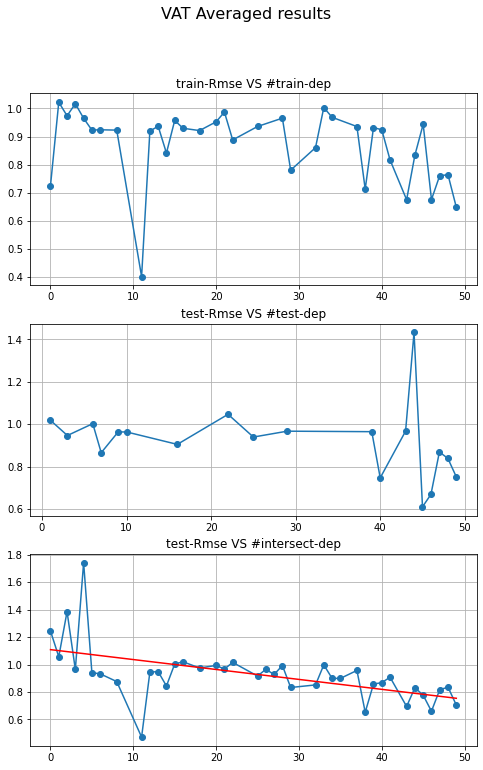

In [37]:

fig_VAT , axs = plt.subplots(3, 1, figsize=(8,12))
axs[0].plot(x_train_VAT, averaged_y_train_VAT, marker='o', linestyle='-')
axs[0].set_title('train-Rmse VS #train-dep')

#axs[0].xlabel('x')
#axs[0].ylabel('Average y')
#axs[0].title('Averaged 2D Plot')


axs[1].plot(x_test_VAT, averaged_y_test_VAT, marker='o', linestyle='-')
axs[1].set_title('test-Rmse VS #test-dep')

axs[2].plot(x_intersect_VAT, averaged_y_intersect_VAT, marker='o', linestyle='-')
axs[2].set_title('test-Rmse VS #intersect-dep')

# Perform linear regression
slope_avgVAT, intercept_avgVAT, r_value_avgVAT, p_value_avgVAT, std_err_avgVAT = linregress(x_intersect_VAT, averaged_y_intersect_VAT)
# Create a line of best fit
x_fit_avgVAT = np.array(x_intersect_VAT)
y_fit_avgVAT = intercept_avgVAT + slope_avgVAT * x_fit_avgVAT
axs[2].plot(x_fit_avgVAT, y_fit_avgVAT, color='red')


axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

print("slope_avgVAT:",slope_avgVAT)
print("intercept_avgVAT:",intercept_avgVAT)
fig_VAT.suptitle('VAT Averaged results', fontsize=16)

plt.show()

## NST-MODEL

slope_NST: -0.006961353223026165
intercept_NST: 0.9874331096330391


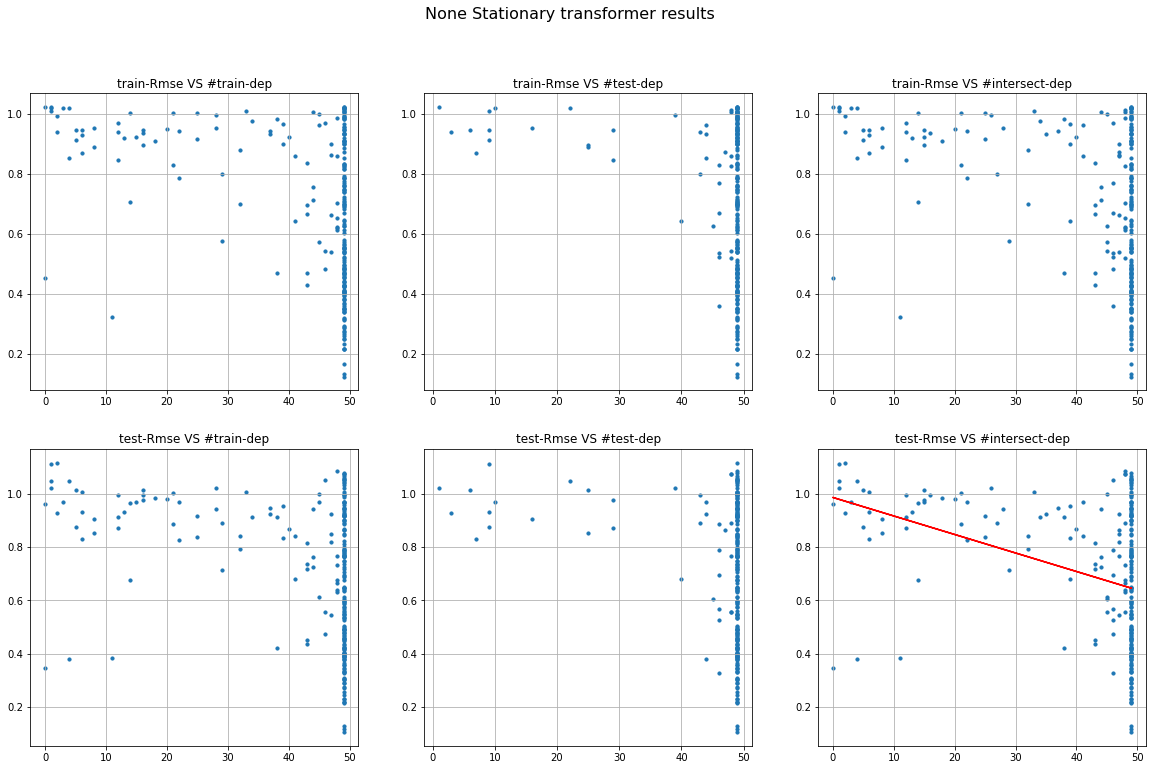

In [38]:
# Initialize empty lists to store the 'x' and 'y' values
#NST
x_train_NST = []
x_test_NST = []
x_intersect_NST= []

y_train_NST = []
y_test_NST = []


# Iterate through your final_result_dict
for flow_key, data_NST in NST_final_result_dict.items():
    x1 = data_NST['dep_train']
    x2 = data_NST['dep_test']
    x3 = data_NST['dep_intersect']

    y1 = data_NST['train_err']
    y2 = data_NST['test_err']

    x_train_NST.append(x1)
    x_test_NST.append(x2)
    x_intersect_NST.append(x3)

    y_train_NST.append(y1)
    y_test_NST.append(y2)



# Perform linear regression
slope_NST, intercept_NST, r_value_NST, p_value_NST, std_err_NST = linregress(x_intersect_NST, y_test_NST)

# Create a line of best fit
x_fit_NST = np.array(x_intersect_NST)
y_fit_NST = intercept_NST + slope_NST * x_fit_NST

# Create the 2D plot using Matplotlib
fig2 , axs = plt.subplots(2, 3, figsize=(20,12))

axs[0][0].scatter(x_train_NST, y_train_NST, marker='o', s=10)  # s specifies the marker size
axs[0][0].set_title('train-Rmse VS #train-dep')

axs[0][1].scatter(x_test_NST, y_train_NST, marker='o', s=10)  # s specifies the marker size
axs[0][1].set_title('train-Rmse VS #test-dep')

axs[0][2].scatter(x_intersect_NST, y_train_NST, marker='o', s=10)  # s specifies the marker size
axs[0][2].set_title('train-Rmse VS #intersect-dep')




axs[1][0].scatter(x_train_NST, y_test_NST, marker='o', s=10)  # s specifies the marker size
axs[1][0].set_title('test-Rmse VS #train-dep')

axs[1][1].scatter(x_test_NST, y_test_NST, marker='o', s=10)  # s specifies the marker size
axs[1][1].set_title('test-Rmse VS #test-dep')

axs[1][2].scatter(x_intersect_NST, y_test_NST, marker='o', s=10)  # s specifies the marker size
axs[1][2].set_title('test-Rmse VS #intersect-dep')
axs[1][2].plot(x_fit_NST, y_fit_NST, label='Line of Best Fit', color='red')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('2D Plot of x and y')
axs[0][0].grid(True)
axs[0][1].grid(True)
axs[0][2].grid(True)
axs[1][0].grid(True)
axs[1][1].grid(True)
axs[1][2].grid(True)
fig2.suptitle('None Stationary transformer results', fontsize=16)

print("slope_NST:",slope_NST)
print("intercept_NST:",intercept_NST)


plt.show()








In [39]:
x_test_NST = []
x_train_NST= []
x_intersect_NST = []

averaged_y_test_NST = []
averaged_y_train_NST = []
averaged_y_intersect_NST = []



for x in range(50):  # Iterate over possible 'x' values from 0 to 49
    y_test_values_NST = []  # Store 'y' values for a particular 'x'
    y_train_values_NST = []
    y_intersect_values_NST = []
    print("x:",x)

    for flow_key, data_NST in NST_final_result_dict.items():
        if data_NST['dep_test'] == x:
            y_test_values_NST.append(data_NST['test_err'])

        if data_NST['dep_train'] == x:
            y_train_values_NST.append(data_NST['train_err'])

        if data_NST['dep_intersect'] == x:
            y_intersect_values_NST.append(data_NST['test_err'])

    if y_test_values_NST:  # Check if there are 'y' values for this 'x'
        print('test')
        x_test_NST.append(x)
        averaged_y_test_NST.append(np.mean(y_test_values_NST))

    if y_train_values_NST:  # Check if there are 'y' values for this 'x'
        print('train')
        x_train_NST.append(x)
        averaged_y_train_NST.append(np.mean(y_train_values_NST))

    if y_intersect_values_NST:  # Check if there are 'y' values for this 'x'
        print('intersect')
        x_intersect_NST.append(x)
        averaged_y_intersect_NST.append(np.mean(y_intersect_values_NST))
    print("**********************************************************************")


print(len(x_train_NST))
print(len(averaged_y_train_NST))

x: 0
train
intersect
**********************************************************************
x: 1
test
train
intersect
**********************************************************************
x: 2
train
intersect
**********************************************************************
x: 3
test
train
intersect
**********************************************************************
x: 4
train
intersect
**********************************************************************
x: 5
train
intersect
**********************************************************************
x: 6
test
train
intersect
**********************************************************************
x: 7
test
**********************************************************************
x: 8
train
intersect
**********************************************************************
x: 9
test
**********************************************************************
x: 10
test
**********************************************************************
x: 11

slope_avgnst: -0.002862046420743298
intercept_avgnst: 0.9270350383993056


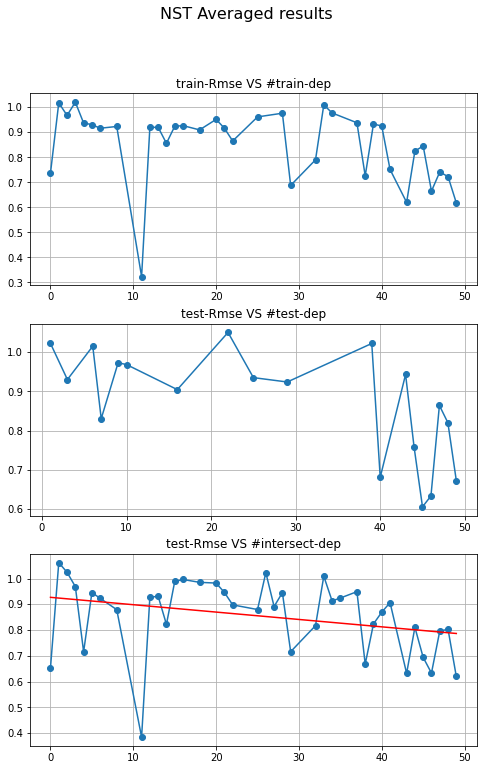

In [40]:

fig3 , axs = plt.subplots(3, 1, figsize=(8,12))
axs[0].plot(x_train_NST, averaged_y_train_NST, marker='o', linestyle='-')
axs[0].set_title('train-Rmse VS #train-dep')

#axs[0].xlabel('x')
#axs[0].ylabel('Average y')
#axs[0].title('Averaged 2D Plot')


axs[1].plot(x_test_NST, averaged_y_test_NST, marker='o', linestyle='-')
axs[1].set_title('test-Rmse VS #test-dep')

axs[2].plot(x_intersect_NST, averaged_y_intersect_NST, marker='o', linestyle='-')
axs[2].set_title('test-Rmse VS #intersect-dep')

# Perform linear regression
slope_avgnst, intercept_avgnst, r_value_avgnst, p_value_avgnst, std_err_avgnst = linregress(x_intersect_NST, averaged_y_intersect_NST)
# Create a line of best fit
x_fit_avgnst = np.array(x_intersect_NST)
y_fit_avgnst = intercept_avgnst + slope_avgnst * x_fit_avgnst
axs[2].plot(x_fit_avgnst, y_fit_avgnst, color='red')


axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

print("slope_avgnst:",slope_avgnst)
print("intercept_avgnst:",intercept_avgnst)
fig3.suptitle('NST Averaged results', fontsize=16)

plt.show()

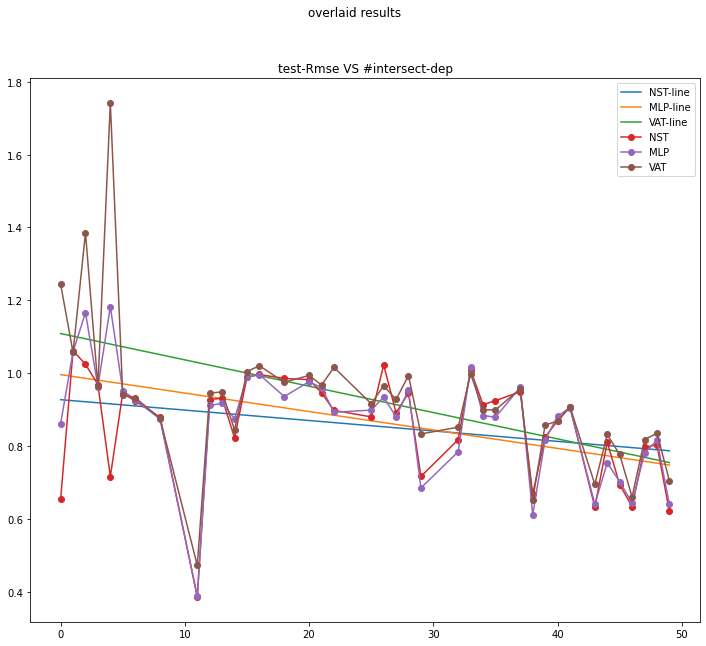

In [41]:

fig ,ax =plt.subplots(1,1,figsize=(12,10))
ax.plot(x_fit_avgnst,y_fit_avgnst,label='NST-line')
ax.plot(x_fit_avgmlp,y_fit_avgmlp,label='MLP-line')
ax.plot(x_fit_avgVAT,y_fit_avgVAT,label='VAT-line')


ax.plot(x_intersect_NST, averaged_y_intersect_NST, marker='o', linestyle='-',label='NST')
ax.plot(x_intersect_MLP, averaged_y_intersect_MLP, marker='o', linestyle='-',label='MLP')
ax.plot(x_intersect_VAT, averaged_y_intersect_VAT, marker='o', linestyle='-',label='VAT')


ax.legend()
ax.set_title('test-Rmse VS #intersect-dep')
fig.suptitle("overlaid results")
plt.show()